In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10


In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 [==============================] - 4s 0us/step


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),

    # Dilated convolution with stride
    Conv2D(64, (3, 3), activation='relu', dilation_rate=(1, 1), strides=(1, 1)),

    MaxPooling2D((2, 2)),

    # Dilated convolution with stride
    Conv2D(64, (3, 3), activation='relu', dilation_rate=(1, 1), strides=(1, 1)),

    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1563/1563 [==============================] - 231s 147ms/step - loss: 1.3545 - accuracy: 0.5164 - val_loss: 1.0950 - val_accuracy: 0.6243
Epoch 2/3
1563/1563 [==============================] - 220s 141ms/step - loss: 0.9611 - accuracy: 0.6672 - val_loss: 0.9345 - val_accuracy: 0.6747
Epoch 3/3
1563/1563 [==============================] - 221s 142ms/step - loss: 0.8088 - accuracy: 0.7200 - val_loss: 0.8417 - val_accuracy: 0.7119


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 9s - loss: 0.8417 - accuracy: 0.7119 - 9s/epoch - 30ms/step
Test accuracy: 0.711899995803833


In [14]:
pip install pydot graphviz

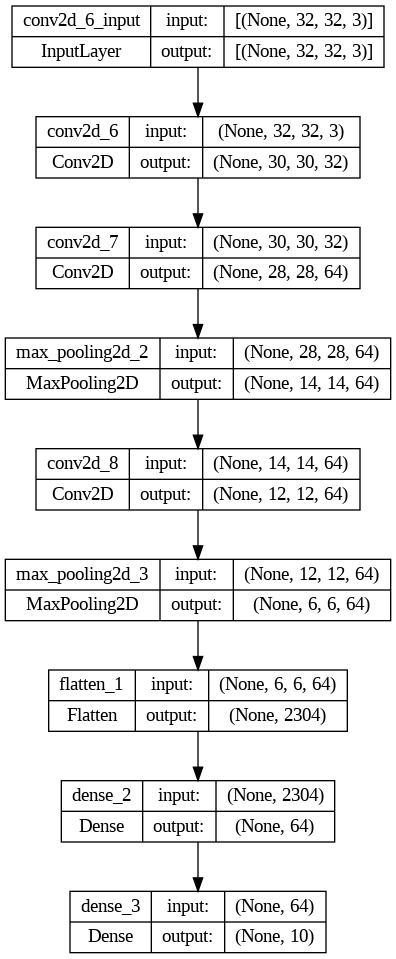

In [15]:
from tensorflow.keras.utils import plot_model

# Visualize the model and save it to a file
plot_model(model, to_file='dilated_cnn.png', show_shapes=True, show_layer_names=True)

# Display the visualization (if you're running this in a Jupyter Notebook)
from IPython.display import Image
Image(filename='dilated_cnn.png')

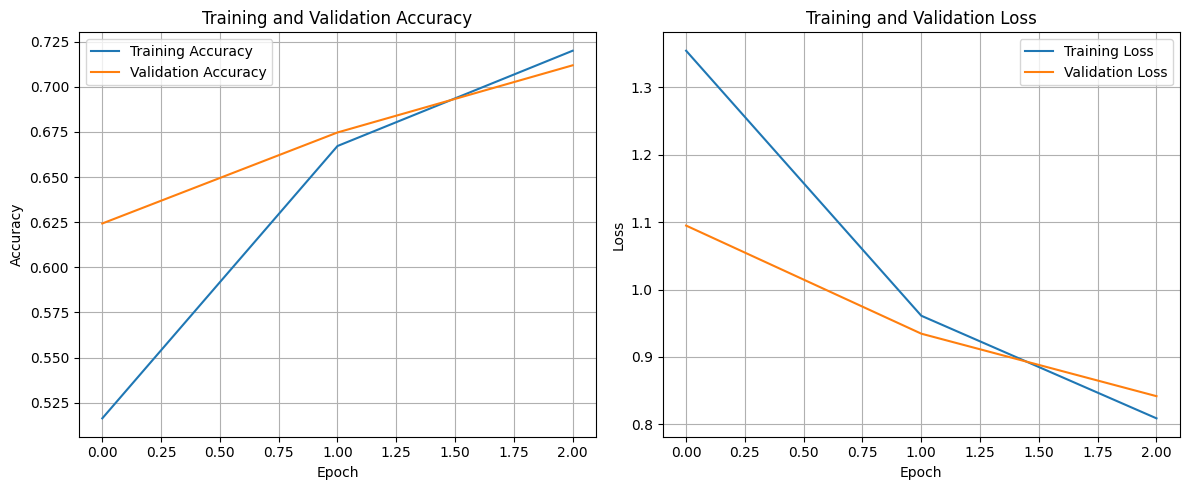

In [16]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 [==============================] - 28s 87ms/step


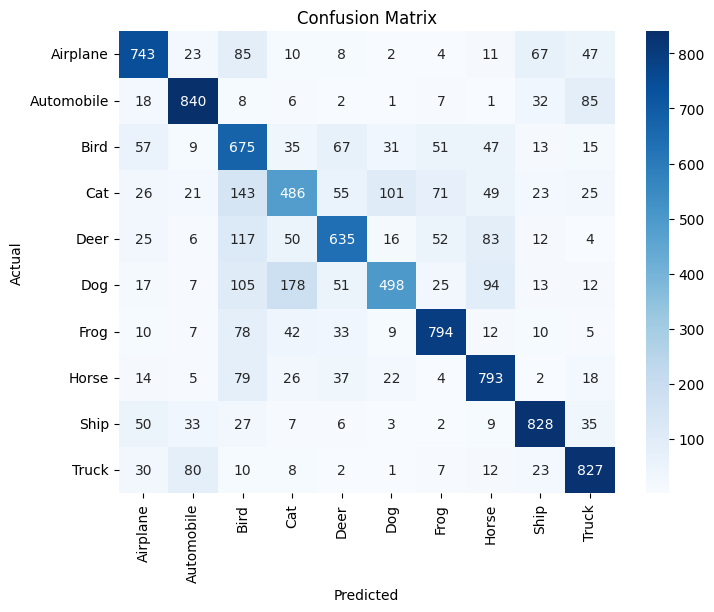

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Get predictions for the test data
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()